# EDA


- The os module has a perfect method to list files in a directory.
- Pandas json normalize could work here but is not necessary to convert the JSON data to a dataframe.
- You may need a nested for-loop to access each sale!
- We've put a lot of time into creating the structure of this repository, and it's a good example for future projects.  In the file functions_variables.py, there is an example function that you can import and use.  If you have any variables, functions or classes that you want to make, they can be put in the functions_variables.py file and imported into a notebook.  Note that only .py files can be imported into a notebook. If you want to import everything from a .py file, you can use the following:
```python
from functions_variables import *
```
If you just import functions_variables, then each object from the file will need to be prepended with "functions_variables"\
Using this .py file will keep your notebooks very organized and make it easier to reuse code between notebooks.

In [1]:
# (this is not an exhaustive list of libraries)
import pandas as pd
import numpy as np
import os
import json
from pprint import pprint
from functions_variables import encode_tags
import matplotlib.pyplot as plt
import seaborn as sns


## Data Importing

In [2]:
# load one file first to see what type of data you're dealing with and what attributes it has
json_file = open('../data/AK_Juneau_0.json')
data = json.load(json_file)
df = pd.json_normalize(data['data']['results'])
df.head()


,last_update_date,tags,permalink,status,list_date,open_houses,branding,list_price,property_id,photos,...,location.address.state_code,location.address.line,location.street_view_url,location.county.fips_code,location.county.name,primary_photo,source,products,location.address.coordinate,other_listings
0,2023-09-19T20:52:50Z,"[carport, community_outdoor_space, cul_de_sac,...",9453-Herbert-Pl_Juneau_AK_99801_M90744-30767,sold,2023-06-29T21:16:25.000000Z,None,"[{'name': 'EXP Realty LLC - Southeast Alaska',...",554950.0,9074430767,"[{'tags': [{'label': 'house_view', 'probabilit...",...,AK,9453 Herbert Pl,https://maps.googleapis.com/maps/api/streetvie...,None,Juneau,NaN,NaN,NaN,NaN,NaN
1,None,None,8477-Thunder-Mountain-Rd_Juneau_AK_99801_M9424...,sold,None,None,"[{'name': None, 'photo': None, 'type': 'Office'}]",NaN,9424983842,None,...,AK,8477 Thunder Mountain Rd,https://maps.googleapis.com/maps/api/streetvie...,None,Juneau,NaN,NaN,NaN,NaN,NaN
2,None,None,4515-Glacier-Hwy_Juneau_AK_99801_M94790-68516,sold,None,None,"[{'name': None, 'photo': None, 'type': 'Office'}]",NaN,9479068516,None,...,AK,4515 Glacier Hwy,https://maps.googleapis.com/maps/api/streetvie...,None,Juneau,NaN,NaN,NaN,NaN,NaN
3,None,None,17850-Point-Stephens-Rd_Juneau_AK_99801_M98793...,sold,None,None,"[{'name': None, 'photo': None, 'type': 'Office'}]",NaN,9879331943,None,...,AK,17850 Point Stephens Rd,https://maps.googleapis.com/maps/api/streetvie...,None,Juneau,NaN,NaN,NaN,NaN,NaN
4,None,None,9951-Stephen-Richards-Memorial-Dr_Juneau_AK_99...,sold,None,None,"[{'name': None, 'photo': None, 'type': 'Office'}]",NaN,9521639574,None,...,AK,9951 Stephen Richards Memorial Dr,https://maps.googleapis.com/maps/api/streetvie...,None,Juneau,NaN,NaN,NaN,NaN,NaN


In [3]:
df.columns

Index(['last_update_date', 'tags', 'permalink', 'status', 'list_date',
       'open_houses', 'branding', 'list_price', 'property_id', 'photos',
       'community', 'virtual_tours', 'listing_id', 'price_reduced_amount',
       'matterport', 'primary_photo.href', 'source.plan_id', 'source.agents',
       'source.spec_id', 'source.type', 'description.year_built',
       'description.baths_3qtr', 'description.sold_date',
       'description.sold_price', 'description.baths_full', 'description.name',
       'description.baths_half', 'description.lot_sqft', 'description.sqft',
       'description.baths', 'description.sub_type', 'description.baths_1qtr',
       'description.garage', 'description.stories', 'description.beds',
       'description.type', 'lead_attributes.show_contact_an_agent',
       'flags.is_new_construction', 'flags.is_for_rent',
       'flags.is_subdivision', 'flags.is_contingent', 'flags.is_price_reduced',
       'flags.is_pending', 'flags.is_foreclosure', 'flags.is_plan',


In [4]:
# loop over all files and put them into a dataframe
# get all the files in the data folder with the .json extension
files = [file for file in os.listdir('../data') if file.endswith('.json')]
print(len(files))

# loop over all files and put them into a dataframe
df_list = []
for file in files:
    json_file = open(f'../data/{file}')
    data = json.load(json_file)
    df = pd.json_normalize(data['data']['results'])
    df_list.append(df)

final_df = pd.concat(df_list, ignore_index=True)
final_df


250


,last_update_date,tags,permalink,status,list_date,open_houses,branding,list_price,property_id,photos,...,location.county.fips_code,location.county.name,primary_photo,source,products,location.address.coordinate,other_listings,community.advertisers,community.description.name,location.county
0,2023-09-19T20:52:50Z,"[carport, community_outdoor_space, cul_de_sac,...",9453-Herbert-Pl_Juneau_AK_99801_M90744-30767,sold,2023-06-29T21:16:25.000000Z,None,"[{'name': 'EXP Realty LLC - Southeast Alaska',...",554950.0,9074430767,"[{'tags': [{'label': 'house_view', 'probabilit...",...,None,Juneau,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,None,None,8477-Thunder-Mountain-Rd_Juneau_AK_99801_M9424...,sold,None,None,"[{'name': None, 'photo': None, 'type': 'Office'}]",NaN,9424983842,None,...,None,Juneau,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,None,None,4515-Glacier-Hwy_Juneau_AK_99801_M94790-68516,sold,None,None,"[{'name': None, 'photo': None, 'type': 'Office'}]",NaN,9479068516,None,...,None,Juneau,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,None,None,17850-Point-Stephens-Rd_Juneau_AK_99801_M98793...,sold,None,None,"[{'name': None, 'photo': None, 'type': 'Office'}]",NaN,9879331943,None,...,None,Juneau,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,None,None,9951-Stephen-Richards-Memorial-Dr_Juneau_AK_99...,sold,None,None,"[{'name': None, 'photo': None, 'type': 'Office'}]",NaN,9521639574,None,...,None,Juneau,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8186,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8187,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8188,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8189,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Data Cleaning and Wrangling

At this point, ensure that you have all sales in a dataframe.
- Take a quick look at your data (i.e. `.info()`, `.describe()`) - what do you see?
- Is each cell one value, or do some cells have lists?
- What are the data types of each column?
- Some sales may not actually include the sale price (target).  These rows should be dropped.
- There are a lot of NA/None values.  Should these be dropped or replaced with something?
    - You can drop rows or use various methods to fills NA's - use your best judgement for each column 
    - i.e. for some columns (like Garage), NA probably just means no Garage, so 0
- Drop columns that aren't needed
    - Don't keep the list price because it will be too close to the sale price. Assume we want to predict the price of houses not yet listed

In [5]:
# load and concatenate data here
# drop or replace values as necessary
print(final_df.info())
print(final_df.describe())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8191 entries, 0 to 8190
Data columns (total 67 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   last_update_date                       8125 non-null   object 
 1   tags                                   7638 non-null   object 
 2   permalink                              8159 non-null   object 
 3   status                                 8159 non-null   object 
 4   list_date                              7752 non-null   object 
 5   open_houses                            0 non-null      object 
 6   branding                               8159 non-null   object 
 7   list_price                             7721 non-null   object 
 8   property_id                            8159 non-null   object 
 9   photos                                 7403 non-null   object 
 10  community                              0 non-null      object 
 11  virt

In [6]:
# dropping unneccessary columns that will create noise
final_df = final_df.drop(columns=['open_houses', 'property_id', 'photos','community','virtual_tours','listing_id','primary_photo.href','source.plan_id','source.agents','source.spec_id','source.type',
                                  'description.name','description.baths_1qtr','flags.is_new_construction','flags.is_for_rent','flags.is_subdivision','flags.is_contingent','flags.is_pending','flags.is_price_reduced',
                                  'flags.is_foreclosure','flags.is_plan','flags.is_coming_soon','other_listings.rdc','location.address.coordinate.lon','location.address.coordinate.lat','location.address.line',
                                  'location.street_view_url','location.county.fips_code','location.county.name','primary_photo','source','other_listings','location.address.coordinate','community.advertisers',
                                  'community.description.name','location.county','products','last_update_date','list_date','description.sold_date','status','permalink','products.brand_name','flags.is_new_listing','matterport',
                                  'location.address.postal_code','location.address.state_code','lead_attributes.show_contact_an_agent','branding'], axis=1)
final_df


,tags,list_price,price_reduced_amount,description.year_built,description.baths_3qtr,description.sold_price,description.baths_full,description.baths_half,description.lot_sqft,description.sqft,description.baths,description.sub_type,description.garage,description.stories,description.beds,description.type,location.address.state,location.address.city
0,"[carport, community_outdoor_space, cul_de_sac,...",554950.0,45000.0,1963.0,None,None,2.0,None,10454.0,1821.0,2.0,None,1.0,NaN,3.0,single_family,Alaska,Juneau
1,None,NaN,NaN,NaN,None,None,NaN,None,NaN,NaN,NaN,None,NaN,NaN,NaN,None,Alaska,Juneau
2,None,NaN,NaN,NaN,None,None,NaN,None,NaN,NaN,NaN,None,NaN,NaN,NaN,None,Alaska,Juneau
3,None,NaN,NaN,NaN,None,None,NaN,None,NaN,NaN,NaN,None,NaN,NaN,NaN,None,Alaska,Juneau
4,None,NaN,NaN,NaN,None,None,NaN,None,NaN,NaN,NaN,None,NaN,NaN,NaN,None,Alaska,Juneau
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8186,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8187,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8188,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8189,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8191 entries, 0 to 8190
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   tags                    7638 non-null   object 
 1   list_price              7721 non-null   object 
 2   price_reduced_amount    2484 non-null   object 
 3   description.year_built  7316 non-null   object 
 4   description.baths_3qtr  566 non-null    object 
 5   description.sold_price  6716 non-null   object 
 6   description.baths_full  7311 non-null   object 
 7   description.baths_half  2281 non-null   object 
 8   description.lot_sqft    6991 non-null   object 
 9   description.sqft        7323 non-null   object 
 10  description.baths       7980 non-null   float64
 11  description.sub_type    1427 non-null   object 
 12  description.garage      4448 non-null   object 
 13  description.stories     6260 non-null   object 
 14  description.beds        7504 non-null   

In [8]:
# fill null values
# price_reduced_amount
final_df['price_reduced_amount'] = final_df['price_reduced_amount'].fillna(0)

# year_built
mean_year = final_df['description.year_built'].mean()
final_df['description.year_built'] = final_df['description.year_built'].fillna(mean_year)

# description.baths_3qtr
final_df['description.baths_3qtr'] = final_df['description.baths_3qtr'].fillna(0)

# description.baths_full
mean_baths_full = final_df['description.baths_full'].mean()
final_df['description.baths_full'] = final_df['description.baths_full'].fillna(mean_baths_full)

# description.baths_half
final_df['description.baths_half'] = final_df['description.baths_half'].fillna(0)

# description.beds
final_df['description.beds'] = final_df['description.beds'].fillna(0)

# description.lot_sqft mean
mean_lot_sqft = final_df['description.lot_sqft'].mean()
final_df['description.lot_sqft'] = final_df['description.lot_sqft'].fillna(mean_lot_sqft)

# description.sqft mean
mean_sqft = final_df['description.sqft'].mean()
final_df['description.sqft'] = final_df['description.sqft'].fillna(mean_sqft)

# description.sub_type
final_df['description.sub_type'] = final_df['description.sub_type'].fillna('Unknown')

# description.garage
final_df['description.garage'] = final_df['description.garage'].fillna(0)

# description.stories 
median_stories = final_df['description.stories'].median()
final_df['description.stories'] = final_df['description.stories'].fillna(median_stories)

# description.beds
median_beds = final_df['description.beds'].median()
final_df['description.beds'] = final_df['description.beds'].fillna(median_beds)

# description.type
final_df['description.type'] = final_df['description.type'].fillna('Unknown')

# description.year_built
median_year_built = final_df['description.year_built'].median()
final_df['description.year_built'] = final_df['description.year_built'].fillna(median_year_built)
final_df['description.year_built'] = final_df['description.year_built'].astype(int)

# description.baths
mean_baths = final_df['description.baths'].mean()
final_df['description.baths'] = final_df['description.baths'].fillna(mean_baths)

# list_price
final_df['list_price'] = final_df['list_price'].fillna(0)
final_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8191 entries, 0 to 8190
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   tags                    7638 non-null   object 
 1   list_price              8191 non-null   float64
 2   price_reduced_amount    8191 non-null   float64
 3   description.year_built  8191 non-null   int32  
 4   description.baths_3qtr  8191 non-null   float64
 5   description.sold_price  6716 non-null   object 
 6   description.baths_full  8191 non-null   float64
 7   description.baths_half  8191 non-null   float64
 8   description.lot_sqft    8191 non-null   float64
 9   description.sqft        8191 non-null   float64
 10  description.baths       8191 non-null   float64
 11  description.sub_type    8191 non-null   object 
 12  description.garage      8191 non-null   float64
 13  description.stories     8191 non-null   float64
 14  description.beds        8191 non-null   

In [9]:
# dropping rows where description.sold_price is null
final_df = final_df[final_df['description.sold_price'].notna()]
final_df = final_df[final_df['description.sold_price'] != 0]
final_df = final_df[final_df['location.address.city'].notna()]
final_df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 6711 entries, 30 to 8185
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   tags                    6325 non-null   object 
 1   list_price              6711 non-null   float64
 2   price_reduced_amount    6711 non-null   float64
 3   description.year_built  6711 non-null   int32  
 4   description.baths_3qtr  6711 non-null   float64
 5   description.sold_price  6711 non-null   object 
 6   description.baths_full  6711 non-null   float64
 7   description.baths_half  6711 non-null   float64
 8   description.lot_sqft    6711 non-null   float64
 9   description.sqft        6711 non-null   float64
 10  description.baths       6711 non-null   float64
 11  description.sub_type    6711 non-null   object 
 12  description.garage      6711 non-null   float64
 13  description.stories     6711 non-null   float64
 14  description.beds        6711 non-null  

### Dealing with Tags

Consider the fact that with tags, there are a lot of categorical variables.
- How many columns would we have if we OHE tags, city and state?
- Perhaps we can get rid of tags that have a low frequency.

In [10]:
# OHE categorical variables/ tags here
# tags will have to be done manually
final_df['tags'].value_counts()

[big_lot]                                                                                                                                                                                                                                           62
[rental_property]                                                                                                                                                                                                                                   54
[basement, big_lot]                                                                                                                                                                                                                                 15
[basement, rental_property]                                                                                                                                                                                                                         15
[basement]  

In [11]:
# create two empty lists to store tags and other data separately
tags_list = []
other_data = []

# iterate over the tags column
for sublist in final_df['tags']:
    if isinstance(sublist, list):
        tags_list.extend(sublist)
    else:
        other_data.append(sublist)
        
# convert the tags list to a series and calculate the frequency        
tags_series = pd.Series(tags_list)
tags_freq = tags_series.value_counts()

# convert the other data to a series
other_series = pd.Series(other_data)

print("Tags Frequency:")
print(tags_freq)
type(tags_freq)

# print("\nOther Data:")
# print(other_series)


Tags Frequency:
garage_1_or_more           3773
central_air                3410
community_outdoor_space    3117
dishwasher                 2970
basement                   2931
                           ... 
courtyard_entry               5
greenhouse                    5
two_kitchen                   5
boat_dock                     5
dual_master_bedroom           5
Length: 152, dtype: int64


pandas.core.series.Series

In [12]:
# looking for tags with frequency greater than 1000
tags_freq[tags_freq > 1000]
len(tags_freq[tags_freq > 1000])



21

In [13]:
final_df_copy = final_df.copy()
final_df_copy = encode_tags(final_df_copy)
final_df_copy




,tags,list_price,price_reduced_amount,description.year_built,description.baths_3qtr,description.sold_price,description.baths_full,description.baths_half,description.lot_sqft,description.sqft,...,city_view,two_or_more_stories,recreation_facilities,shopping,washer_dryer,basement,view,forced_air,family_room,dining_room
30,"[central_air, central_heat, community_outdoor_...",129900.0,0.0,1998,0.0,129900,2.00000,0.0,11761.000000,1478.000000,...,0,0,0,0,0,0,0,0,0,0
31,"[city_view, hardwood_floors, two_or_more_stori...",88000.0,3000.0,1945,0.0,88500,2.00000,0.0,6534.000000,1389.000000,...,1,1,0,0,0,0,0,0,0,0
32,"[carport, central_air, central_heat, dishwashe...",149000.0,0.0,1969,0.0,145000,2.00000,0.0,17424.000000,2058.000000,...,0,0,0,0,0,0,0,0,0,0
33,"[carport, central_air, city_view, community_ou...",68000.0,9000.0,1955,0.0,65000,2.00000,0.0,9712.000000,1432.000000,...,1,0,1,0,0,0,0,0,0,0
34,"[city_view, single_story, big_yard, fenced_yar...",169999.0,5000.0,1984,0.0,169000,2.00000,0.0,10890.000000,1804.000000,...,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8181,"[central_air, forced_air, basement, two_or_mor...",98000.0,0.0,1910,0.0,99000,1.00000,0.0,4792.000000,1214.000000,...,0,1,0,0,0,1,0,1,0,0
8182,"[basement, big_lot]",49999.0,0.0,1968,0.0,29700,1.00000,0.0,7841.000000,988.000000,...,0,0,0,0,0,1,0,0,0,0
8183,"[basement, big_lot]",133000.0,0.0,1968,0.0,162250,1.00000,0.0,65340.000000,1470.000000,...,0,0,0,0,0,1,0,0,0,0
8184,[rental_property],75000.0,0.0,1968,0.0,63800,1.88743,0.0,251094.946789,1933.848559,...,0,0,0,0,0,0,0,0,0,0


In [14]:
# drop the tags column
final_df_copy = final_df_copy.drop(columns=['tags'], axis=1)
final_df_copy


,list_price,price_reduced_amount,description.year_built,description.baths_3qtr,description.sold_price,description.baths_full,description.baths_half,description.lot_sqft,description.sqft,description.baths,...,city_view,two_or_more_stories,recreation_facilities,shopping,washer_dryer,basement,view,forced_air,family_room,dining_room
30,129900.0,0.0,1998,0.0,129900,2.00000,0.0,11761.000000,1478.000000,2.0,...,0,0,0,0,0,0,0,0,0,0
31,88000.0,3000.0,1945,0.0,88500,2.00000,0.0,6534.000000,1389.000000,2.0,...,1,1,0,0,0,0,0,0,0,0
32,149000.0,0.0,1969,0.0,145000,2.00000,0.0,17424.000000,2058.000000,2.0,...,0,0,0,0,0,0,0,0,0,0
33,68000.0,9000.0,1955,0.0,65000,2.00000,0.0,9712.000000,1432.000000,2.0,...,1,0,1,0,0,0,0,0,0,0
34,169999.0,5000.0,1984,0.0,169000,2.00000,0.0,10890.000000,1804.000000,2.0,...,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8181,98000.0,0.0,1910,0.0,99000,1.00000,0.0,4792.000000,1214.000000,1.0,...,0,1,0,0,0,1,0,1,0,0
8182,49999.0,0.0,1968,0.0,29700,1.00000,0.0,7841.000000,988.000000,1.0,...,0,0,0,0,0,1,0,0,0,0
8183,133000.0,0.0,1968,0.0,162250,1.00000,0.0,65340.000000,1470.000000,1.0,...,0,0,0,0,0,1,0,0,0,0
8184,75000.0,0.0,1968,0.0,63800,1.88743,0.0,251094.946789,1933.848559,0.0,...,0,0,0,0,0,0,0,0,0,0


### Dealing with Cities

- Sales will vary drastically between cities and states.  Is there a way to keep information about which city it is without OHE?
- Could we label encode or ordinal encode?  Yes, but this may have undesirable effects, giving nominal data ordinal values.
- What we can do is use our training data to encode the mean sale price by city as a feature (a.k.a. Target Encoding)
    - We can do this as long as we ONLY use the training data - we're using the available data to give us a 'starting guess' of the price for each city, without needing to encode city explicitly
- If you replace cities or states with numerical values (like the mean price), make sure that the data is split so that we don't leak data into the training selection. This is a great time to train test split. Compute on the training data, and join these values to the test data
- Note that you *may* have cities in the test set that are not in the training set. You don't want these to be NA, so maybe you can fill them with the overall mean

In [15]:
# perform train test split here
# do something with state and city
print(final_df_copy['location.address.city'].value_counts())
print(final_df_copy['location.address.state'].value_counts())


Montgomery     210
Raleigh        210
Frankfort      210
Harrisburg     210
Lansing        210
              ... 
Alexander        2
Old Hickory      2
Tolleson         1
Hermitage        1
Galloway         1
Name: location.address.city, Length: 84, dtype: int64
Alabama           210
Michigan          210
Wisconsin         210
Washington        210
Virginia          210
Rhode Island      210
Pennsylvania      210
Oregon            210
Oklahoma          210
New York          210
Nevada            210
New Jersey        210
Nebraska          210
North Carolina    210
Arkansas          210
Minnesota         210
Maryland          210
Massachusetts     210
Arizona           210
California        210
Colorado          210
Connecticut       210
Delaware          210
Florida           210
Georgia           210
Iowa              210
Indiana           210
Kentucky          210
Ohio              205
West Virginia     204
Illinois          170
South Carolina    160
Tennessee          80
Hawaii     

In [18]:
# removing outliers
index_outliers = final_df_copy[final_df_copy['description.sold_price'] > 2000000].index
print(len(index_outliers))
final_df_copy = final_df_copy.drop(index_outliers)
'''
This was done after looking at visualizations below
'''

73


In [19]:
# train test split
from sklearn.model_selection import train_test_split

train_df, test_df = train_test_split(final_df_copy, test_size=0.2, random_state=42)

train_df


,list_price,price_reduced_amount,description.year_built,description.baths_3qtr,description.sold_price,description.baths_full,description.baths_half,description.lot_sqft,description.sqft,description.baths,...,city_view,two_or_more_stories,recreation_facilities,shopping,washer_dryer,basement,view,forced_air,family_room,dining_room
5815,0.0,0.0,1968,0.0,115000,1.88743,0.0,251094.946789,1933.848559,0.000000,...,0,0,0,0,0,0,0,0,0,0
1302,850000.0,0.0,2019,0.0,800000,2.00000,1.0,10181.000000,1965.000000,3.000000,...,0,1,1,0,1,0,1,1,1,1
7760,449900.0,0.0,1974,1.0,450000,2.00000,0.0,8100.000000,1579.000000,2.000000,...,0,1,1,1,1,0,0,1,1,1
5581,156000.0,0.0,1925,0.0,152500,1.00000,0.0,2614.000000,884.000000,1.000000,...,0,0,0,1,1,1,0,0,0,1
7600,360000.0,0.0,1985,1.0,375000,1.00000,0.0,2209.000000,1072.000000,2.000000,...,0,0,1,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4654,609000.0,0.0,2015,1.0,609000,2.00000,0.0,8614.000000,2898.000000,3.000000,...,1,0,0,0,1,1,1,1,1,0
6290,225000.0,0.0,1900,0.0,30000,1.88743,0.0,1742.000000,2324.000000,2.131203,...,0,0,0,0,0,0,0,1,0,0
6325,99990.0,0.0,1953,0.0,107000,1.00000,0.0,871.000000,1222.000000,1.000000,...,0,1,0,1,0,1,0,1,0,0
6491,1350000.0,0.0,1983,0.0,1325000,2.00000,0.0,7876.000000,4952.000000,2.000000,...,0,0,0,1,0,1,0,1,0,0


In [20]:
# calculate mean sold price for each city in the training set, map it to the city column in train and test sets, and fill missing city prices in test set with the global mean price
city_mean_prices = train_df.groupby('location.address.city')['description.sold_price'].mean()
global_mean_price = train_df['description.sold_price'].mean()
train_df['city_mean_price'] = train_df['location.address.city'].map(city_mean_prices)
test_df['city_mean_price'] = test_df['location.address.city'].map(city_mean_prices).fillna(global_mean_price)
train_df = train_df.drop('location.address.city', axis=1)
test_df = test_df.drop('location.address.city', axis=1)

In [21]:
# calculate mean sold price for each state in the training set, map it to the state column in train and test sets, and fill missing state prices in test set with the global mean price
state_mean_prices = train_df.groupby('location.address.state')['description.sold_price'].mean()
train_df['state_mean_price'] = train_df['location.address.state'].map(state_mean_prices)
global_mean_price = train_df['description.sold_price'].mean()
test_df['state_mean_price'] = test_df['location.address.state'].map(state_mean_prices).fillna(global_mean_price)
train_df = train_df.drop('location.address.state', axis=1)
test_df = test_df.drop('location.address.state', axis=1)

In [22]:
train_df

,list_price,price_reduced_amount,description.year_built,description.baths_3qtr,description.sold_price,description.baths_full,description.baths_half,description.lot_sqft,description.sqft,description.baths,...,recreation_facilities,shopping,washer_dryer,basement,view,forced_air,family_room,dining_room,city_mean_price,state_mean_price
5815,0.0,0.0,1968,0.0,115000,1.88743,0.0,251094.946789,1933.848559,0.000000,...,0,0,0,0,0,0,0,0,401295.049505,407687.421384
1302,850000.0,0.0,2019,0.0,800000,2.00000,1.0,10181.000000,1965.000000,3.000000,...,1,0,1,0,1,1,1,1,312899.236364,312899.236364
7760,449900.0,0.0,1974,1.0,450000,2.00000,0.0,8100.000000,1579.000000,2.000000,...,1,1,1,0,0,1,1,1,455785.385093,455716.140244
5581,156000.0,0.0,1925,0.0,152500,1.00000,0.0,2614.000000,884.000000,1.000000,...,0,1,1,1,0,0,0,1,240325.194805,260400.457143
7600,360000.0,0.0,1985,1.0,375000,1.00000,0.0,2209.000000,1072.000000,2.000000,...,1,1,0,0,0,0,0,1,455785.385093,455716.140244
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4654,609000.0,0.0,2015,1.0,609000,2.00000,0.0,8614.000000,2898.000000,3.000000,...,0,0,1,1,1,1,1,0,326226.729560,326226.729560
6290,225000.0,0.0,1900,0.0,30000,1.88743,0.0,1742.000000,2324.000000,2.131203,...,0,0,0,0,0,1,0,0,233115.710059,233115.710059
6325,99990.0,0.0,1953,0.0,107000,1.00000,0.0,871.000000,1222.000000,1.000000,...,0,1,0,1,0,1,0,0,233115.710059,233115.710059
6491,1350000.0,0.0,1983,0.0,1325000,2.00000,0.0,7876.000000,4952.000000,2.000000,...,0,1,0,1,0,1,0,0,476079.117647,471298.132911


In [23]:
test_df


,list_price,price_reduced_amount,description.year_built,description.baths_3qtr,description.sold_price,description.baths_full,description.baths_half,description.lot_sqft,description.sqft,description.baths,...,recreation_facilities,shopping,washer_dryer,basement,view,forced_air,family_room,dining_room,city_mean_price,state_mean_price
1682,299000.0,0.0,2006,0.0,299000,2.00000,0.0,6970.000000,1706.000000,2.0,...,0,0,0,0,0,0,0,0,299846.658385,299846.658385
7479,185000.0,0.0,1968,0.0,155000,1.88743,0.0,131116.000000,1933.848559,0.0,...,0,0,0,0,0,0,0,0,342579.245283,410727.300000
3540,425000.0,0.0,1965,0.0,433000,2.00000,0.0,9000.000000,1612.000000,2.0,...,1,0,0,0,0,1,0,0,561072.055901,561072.055901
1575,815000.0,0.0,2020,0.0,810000,2.00000,1.0,23087.000000,2670.000000,3.0,...,0,0,1,0,0,0,0,0,299846.658385,299846.658385
7837,199000.0,0.0,2006,0.0,205000,1.00000,0.0,251094.946789,861.000000,1.0,...,1,0,1,0,0,1,0,0,434656.129032,434639.884393
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6100,649999.0,25001.0,2019,0.0,645000,3.00000,0.0,6970.000000,2334.000000,3.0,...,0,0,0,0,0,1,0,0,436298.791908,436298.791908
585,385000.0,0.0,1973,0.0,385000,2.00000,0.0,8006.000000,1215.000000,2.0,...,0,1,0,0,0,0,0,0,552491.506667,536821.279503
2944,249000.0,0.0,2001,0.0,245000,2.00000,0.0,6534.000000,1580.000000,2.0,...,0,0,0,0,1,1,0,0,268187.861272,268187.861272
3674,164900.0,0.0,1984,0.0,163000,2.00000,0.0,9540.000000,1933.848559,2.0,...,0,0,0,1,0,1,0,0,158230.368098,158230.368098


## Extra Data - STRETCH

> This doesn't need to be part of your Minimum Viable Product (MVP). We recommend you write a functional, basic pipeline first, then circle back and join new data if you have time

> If you do this, try to write your downstream steps in a way it will still work on a dataframe with different features!

- You're not limited to just using the data provided to you. Think/ do some research about other features that might be useful to predict housing prices. 
- Can you import and join this data? Make sure you do any necessary preprocessing and make sure it is joined correctly.
- Example suggestion: could mortgage interest rates in the year of the listing affect the price? 

In [24]:
# import, join and preprocess new data here

In [25]:
train_df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 5310 entries, 5815 to 890
Data columns (total 38 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   list_price                   5310 non-null   float64
 1   price_reduced_amount         5310 non-null   float64
 2   description.year_built       5310 non-null   int32  
 3   description.baths_3qtr       5310 non-null   float64
 4   description.sold_price       5310 non-null   object 
 5   description.baths_full       5310 non-null   float64
 6   description.baths_half       5310 non-null   float64
 7   description.lot_sqft         5310 non-null   float64
 8   description.sqft             5310 non-null   float64
 9   description.baths            5310 non-null   float64
 10  description.sub_type         5310 non-null   object 
 11  description.garage           5310 non-null   float64
 12  description.stories          5310 non-null   float64
 13  description.beds

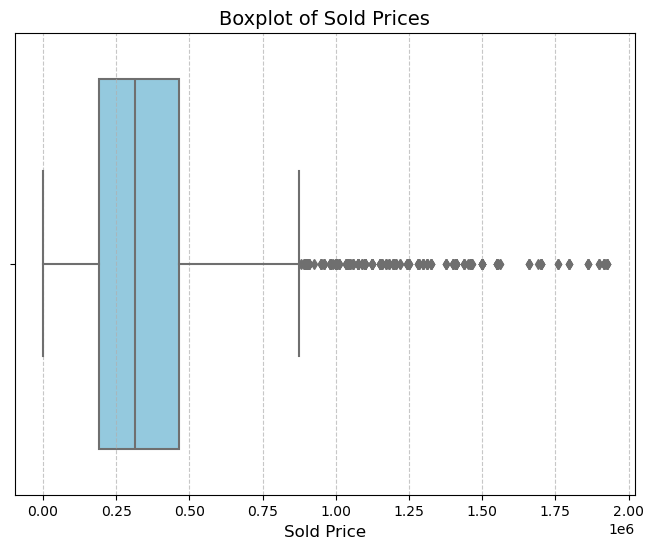

In [26]:
# check outliers
plt.figure(figsize=(8, 6))
sns.boxplot(x=train_df['description.sold_price'], color='skyblue', fliersize=5, linewidth=1.5)
plt.xlabel('Sold Price', fontsize=12)
plt.title('Boxplot of Sold Prices', fontsize=14)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()
# drop sold price > 4000000
train_df = train_df[train_df['description.sold_price'] <= 4000000]

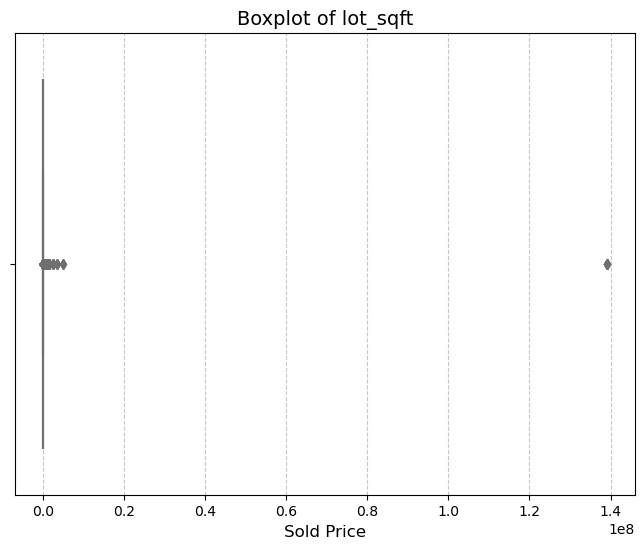

In [27]:
plt.figure(figsize=(8, 6))
sns.boxplot(x=train_df['description.lot_sqft'], color='skyblue', fliersize=5, linewidth=1.5)
plt.xlabel('Sold Price', fontsize=12)
plt.title('Boxplot of lot_sqft', fontsize=14)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()
# drop lot_sqft > 14000000
train_df = train_df[train_df['description.lot_sqft'] <= 14000000]

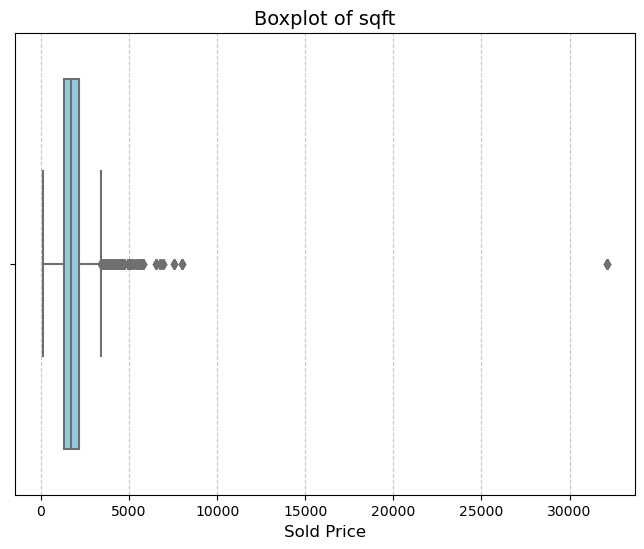

In [28]:
plt.figure(figsize=(8, 6))
sns.boxplot(x=train_df['description.sqft'], color='skyblue', fliersize=5, linewidth=1.5)
plt.xlabel('Sold Price', fontsize=12)
plt.title('Boxplot of sqft', fontsize=14)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

This purpose of these visualizations was to see any outliers within the data.

## EDA/ Visualization

Remember all of the EDA that you've been learning about?  Now is a perfect time for it!
- Look at distributions of numerical variables to see the shape of the data and detect outliers.    
    - Consider transforming very skewed variables
- Scatterplots of a numerical variable and the target go a long way to show correlations.
- A heatmap will help detect highly correlated features, and we don't want these.
    - You may have too many features to do this, in which case you can simply compute the most correlated feature-pairs and list them
- Is there any overlap in any of the features? (redundant information, like number of this or that room...)

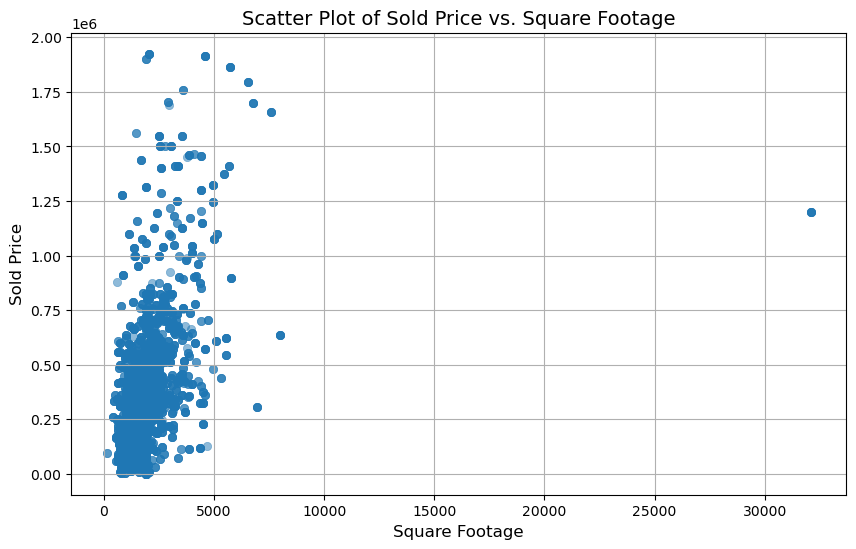

In [29]:
# perform EDA here
import matplotlib.pyplot as plt
import seaborn as sns


plt.figure(figsize=(10, 6))
sns.scatterplot(x='description.sqft', y='description.sold_price', data=train_df, alpha=0.5, edgecolor=None)
plt.xlabel('Square Footage', fontsize=12)
plt.ylabel('Sold Price', fontsize=12)
plt.title('Scatter Plot of Sold Price vs. Square Footage', fontsize=14)
plt.grid(True)
plt.show()


 


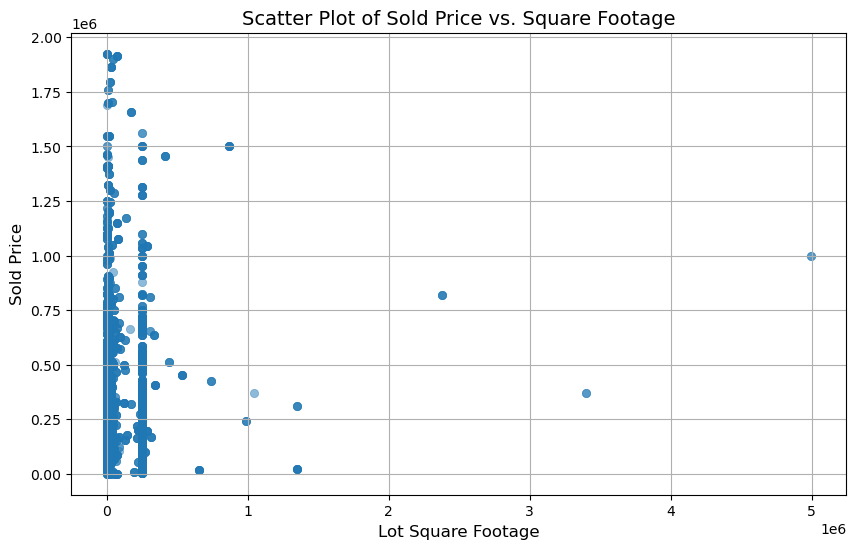

In [30]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='description.lot_sqft', y='description.sold_price', data=train_df, alpha=0.5, edgecolor=None)
plt.xlabel('Lot Square Footage', fontsize=12)
plt.ylabel('Sold Price', fontsize=12)
plt.title('Scatter Plot of Sold Price vs. Square Footage', fontsize=14)
plt.grid(True)
plt.show()



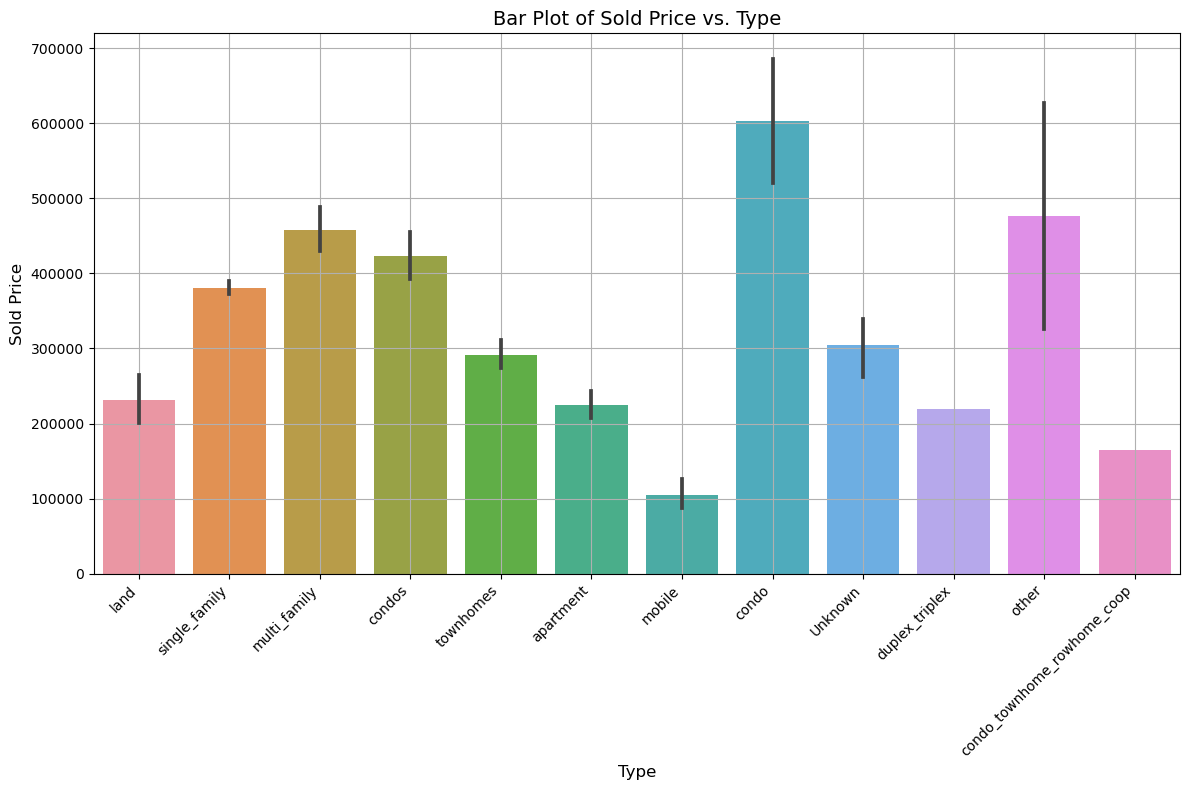

In [31]:
plt.figure(figsize=(12, 8))  # Increase the figure size for better spacing
sns.barplot(x='description.type', y='description.sold_price', data=train_df)
plt.xlabel('Type', fontsize=12)
plt.ylabel('Sold Price', fontsize=12)
plt.title('Bar Plot of Sold Price vs. Type', fontsize=14)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

plt.grid(True)
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()

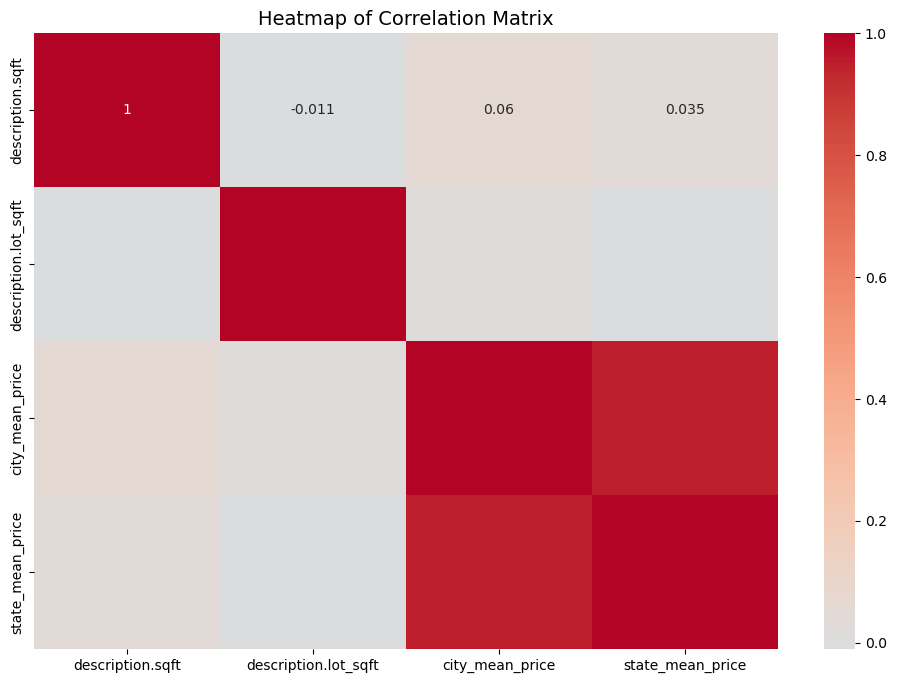

In [32]:
plt.figure(figsize=(12, 8))
sns.heatmap(train_df[['description.sold_price', 'description.sqft', 'description.lot_sqft','city_mean_price','state_mean_price']].corr(), annot=True, cmap='coolwarm', center=0)
plt.title('Heatmap of Correlation Matrix', fontsize=14)
plt.show()

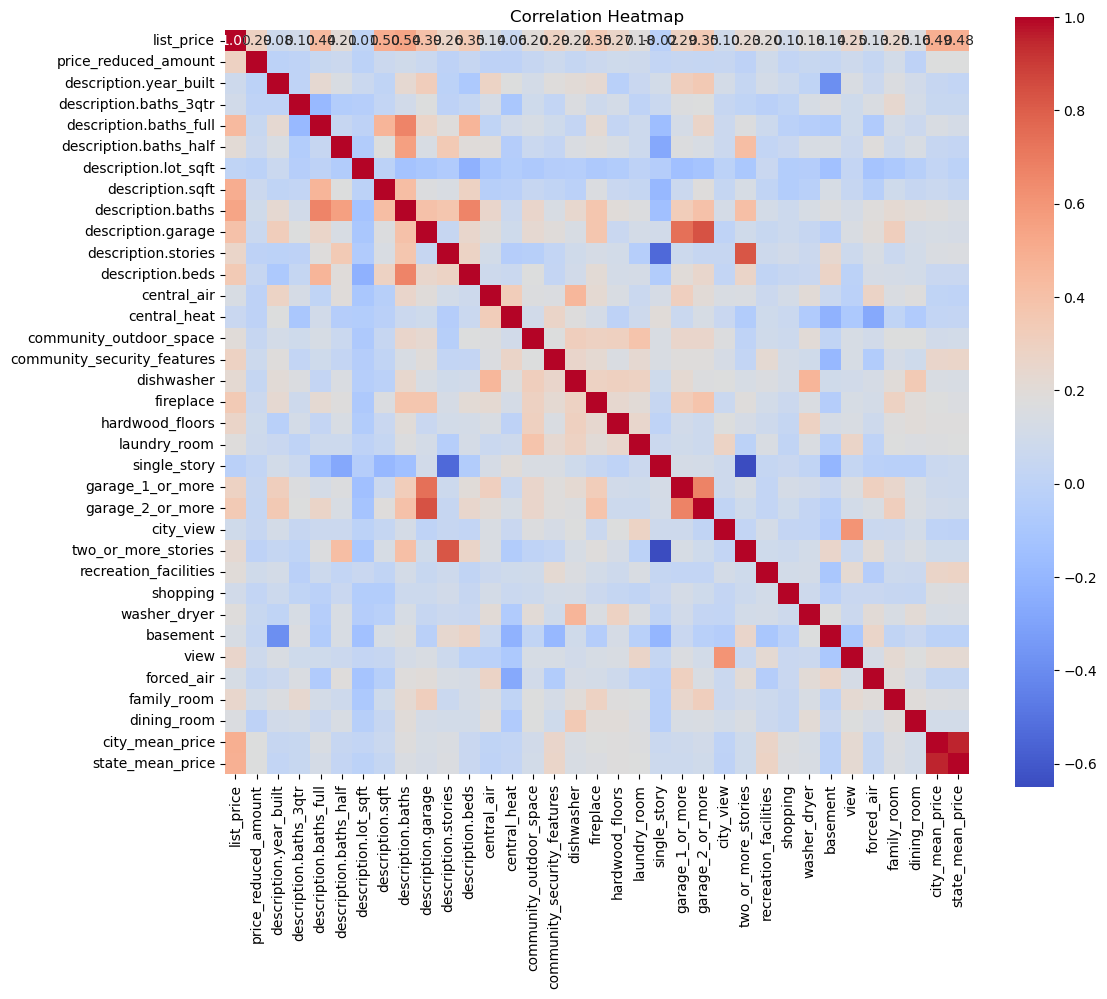

In [33]:
# computing correlation matrix
correlation_matrix = train_df.corr()

# set up the matplotlib figure
plt.figure(figsize=(12,10))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', square=True)
plt.title('Correlation Heatmap')
plt.show()

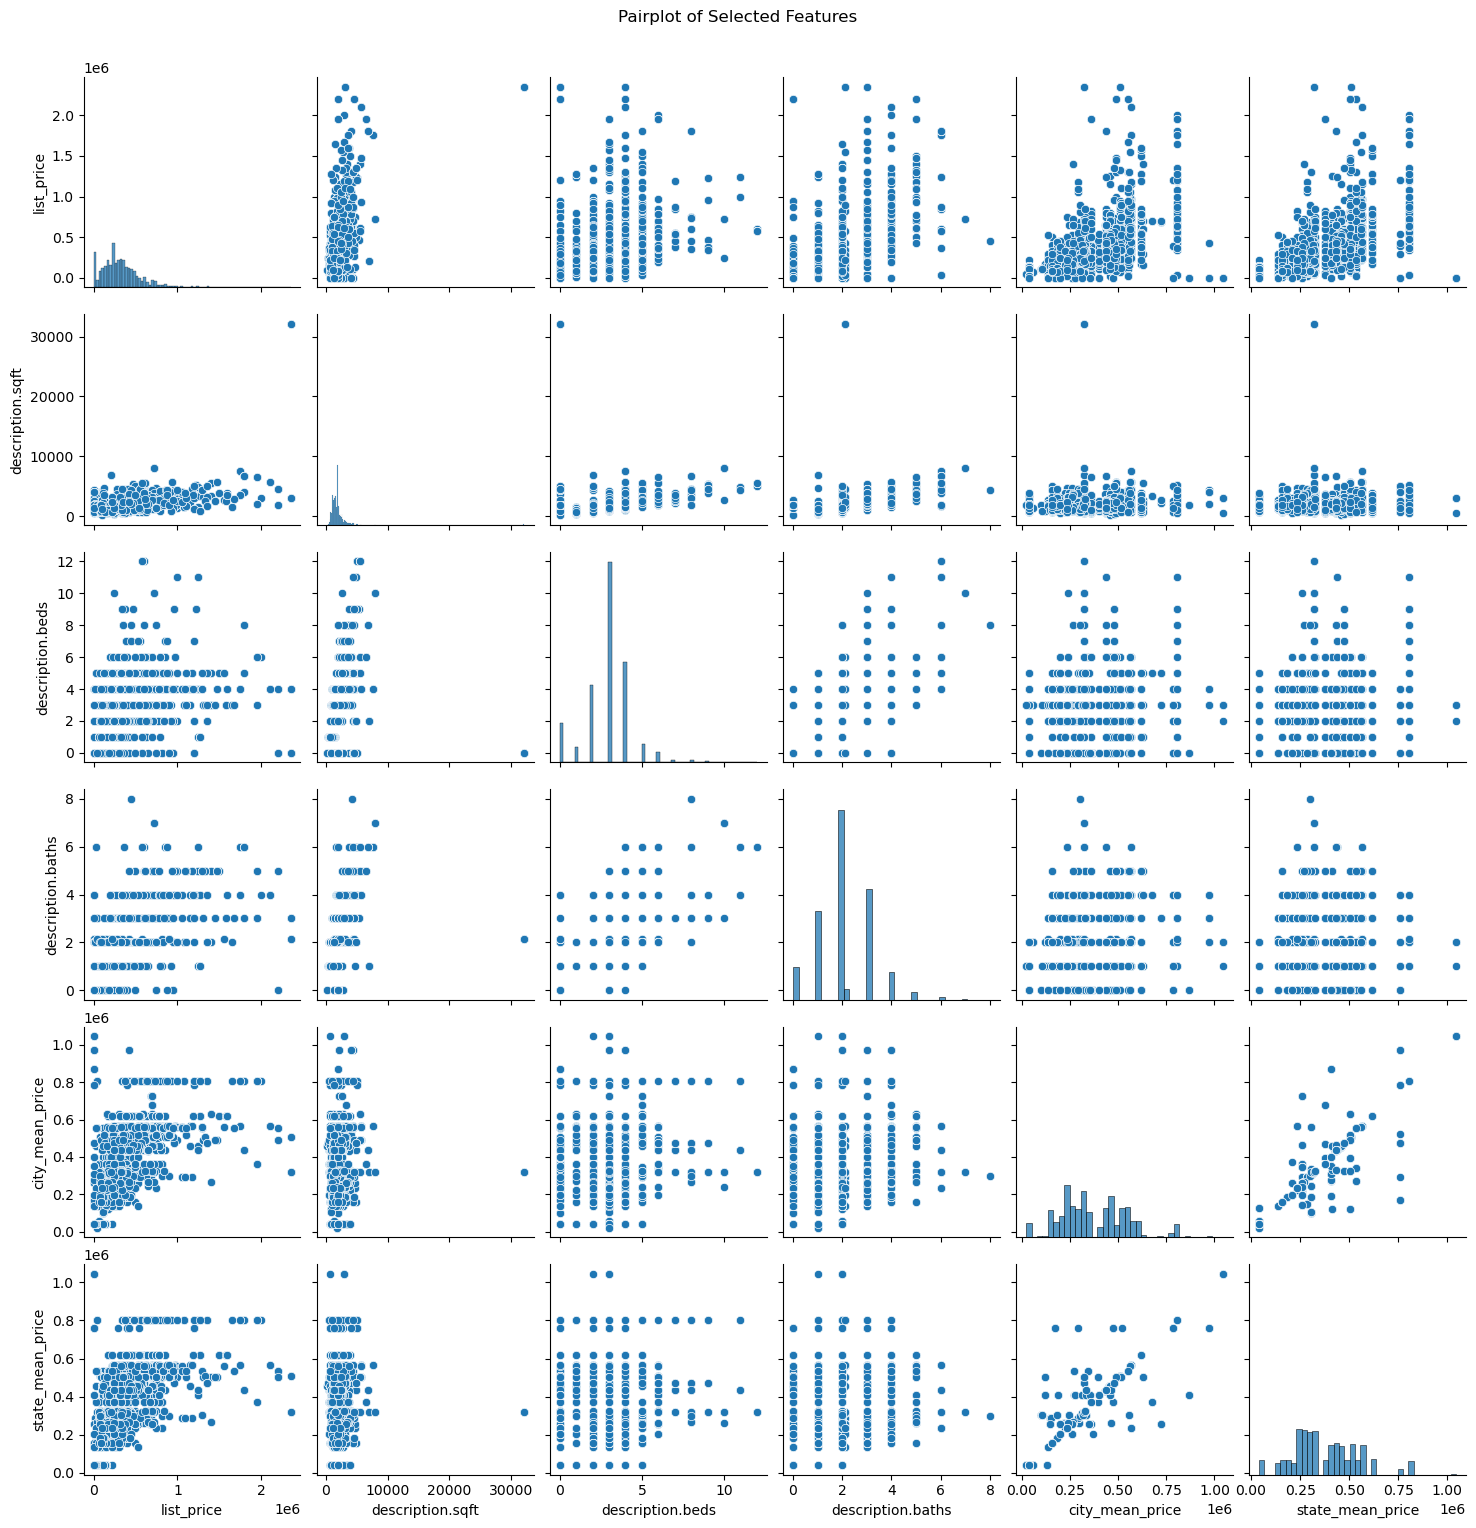

In [34]:
# pairplot to help visualize relationship between selected variables
features_to_plot = [
    'list_price',
    'description.sqft', 
    'description.beds', 
    'description.baths', 
    'city_mean_price', 
    'state_mean_price'
]

sns.pairplot(train_df[features_to_plot])
plt.suptitle('Pairplot of Selected Features', y=1.02)
plt.show()

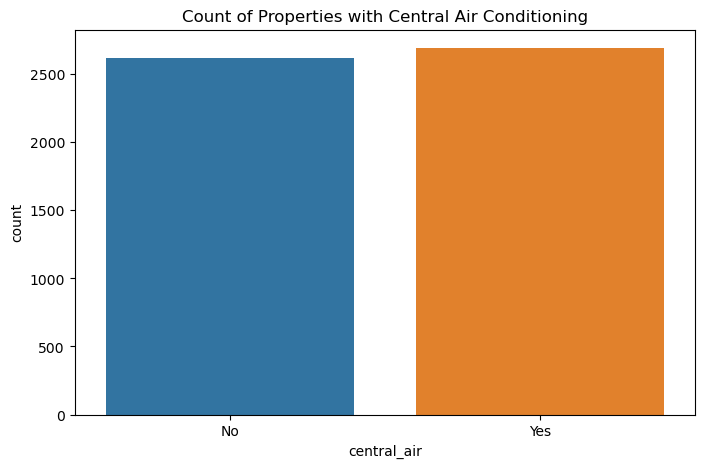

In [35]:
# countplot for visualzing properties features i.e central AC

plt.figure(figsize= (8,5))
sns.countplot(x='central_air', data=train_df)
plt.title('Count of Properties with Central Air Conditioning')
plt.xticks([0, 1], ['No', 'Yes'])
plt.show()

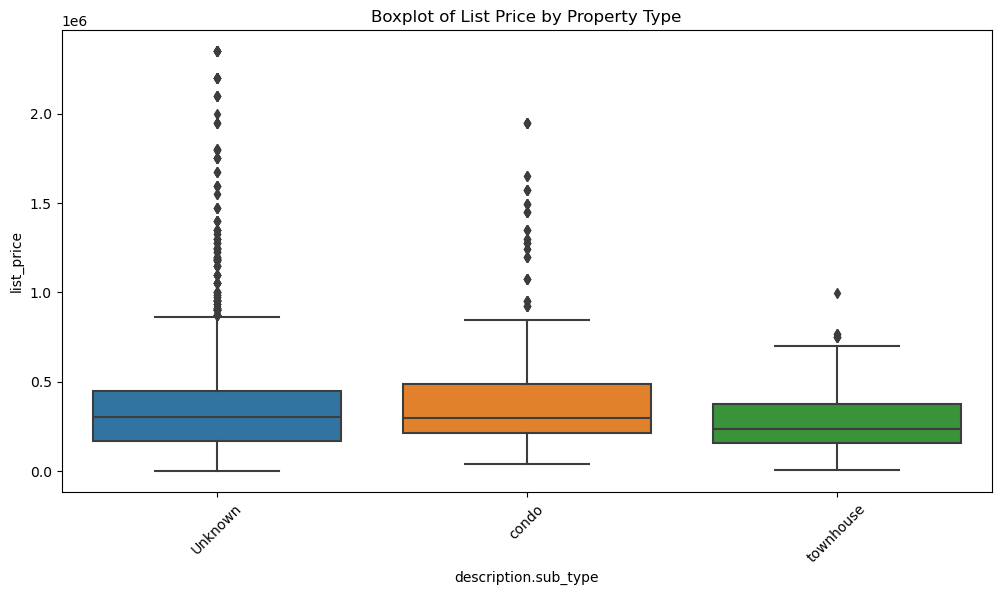

In [36]:
# box plot for outlier detection

plt.figure(figsize=(12,6))
sns.boxplot(x='description.sub_type', y='list_price', data=train_df)
plt.title('Boxplot of List Price by Property Type')
plt.xticks(rotation=45) 
plt.show()

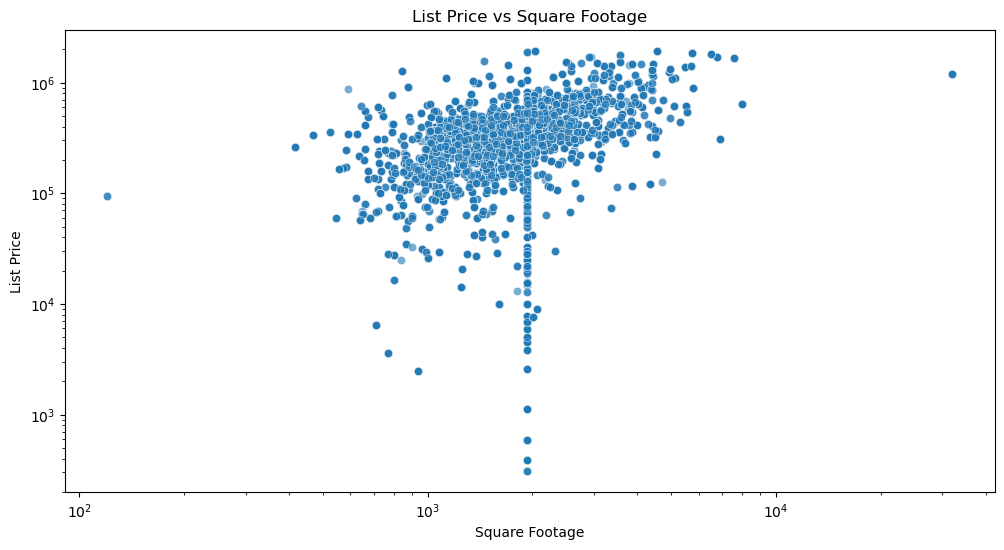

In [37]:
# scatterplot for price vs sqft
plt.figure(figsize=(12, 6))
sns.scatterplot(x='description.sqft', y='description.sold_price', data=train_df, alpha=0.6)
plt.title('List Price vs Square Footage')
plt.xlabel('Square Footage')
plt.ylabel('List Price')
plt.xscale('log')
plt.yscale('log')
plt.show()

## Scaling and Finishing Up

Now is a great time to scale the data and save it once it's preprocessed.
- You can save it in your data folder, but you may want to make a new `processed/` subfolder to keep it organized

In [38]:
train_df.to_csv('../preprocessed/train_df.csv', index=False)
test_df.to_csv('../preprocessed/test_df.csv', index=False)


